In [1]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
from reco_systems.filter import filter_df
from reco_systems.user_game_matrix import *
from reco_systems.CF_knn import *
import seaborn as sns
from reco_systems.evaluation import *
from copy import *

from surprise import SVD
from surprise import Dataset, accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.reader import Reader
%load_ext autoreload
%autoreload 2

In [3]:
# import DB et set min_reviews

folder = "../database_cleaned"
avis_clean  = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean  = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)
users       = pd.read_csv(f"../trictrac_database/users.csv", index_col=0)

min_reviews = 10 # change to set one
rev_filter = filter_df(avis_clean, min_reviews)
rev_filter["Rating"].size

SPLITS = 5

11201 10549
2252 2676
1957 2618
1947 2616
1946 2615
1945 2614


### Choose a number $k$ of latent-factors  to take into account

In [ ]:
# data = Dataset.load_from_df(rev_filter[["User id", "Game id", "Rating"]], reader=Reader(rating_scale=(0, 10)))
# #k_values = np.arange(start=30, stop=300, step=10)
# k_values = np.arange(start=5, stop=70, step=5)
# rmse, mae = [], []
# results = []
# for k in k_values:
#     algo = SVD(n_factors=k, random_state=1)
#     results.append(cross_validate(algo, data, measures=["rmse", "mae"], cv=SPLITS, verbose=True))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8709  1.8684  1.8743  1.8531  1.8574  1.8648  0.0082  
MAE (testset)     1.4621  1.4498  1.4546  1.4452  1.4412  1.4506  0.0073  
Fit time          0.18    0.20    0.23    0.19    0.29    0.22    0.04    
Test time         0.03    0.03    0.03    0.03    0.26    0.08    0.09    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8863  1.8831  1.8720  1.8637  1.8807  1.8771  0.0083  
MAE (testset)     1.4654  1.4617  1.4575  1.4479  1.4619  1.4589  0.0060  
Fit time          0.23    0.25    0.24    0.22    0.25    0.24    0.01    
Test time         0.04    0.03    0.03    0.03    0.15    0.06    0.05    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset

In [ ]:
# from copy import deepcopy
# res_copy = deepcopy(results)

In [ ]:
# for d, k in zip(res_copy, k_values):
#     d['k'] = [k] * SPLITS
#     d["mean_rmse"] = np.mean(d["test_rmse"])
#     d["mean_mae"] = np.mean(d["test_mae"])
# res_copy[0]

{'test_rmse': array([1.87092688, 1.86835347, 1.87427221, 1.85308234, 1.85738198]),
 'test_mae': array([1.46206405, 1.44977537, 1.45460379, 1.44524494, 1.44115479]),
 'fit_time': (0.18233084678649902,
  0.20094990730285645,
  0.23469185829162598,
  0.18921494483947754,
  0.28710007667541504),
 'test_time': (0.03310227394104004,
  0.03044581413269043,
  0.03406691551208496,
  0.030755996704101562,
  0.2579779624938965),
 'k': [5, 5, 5, 5, 5],
 'mean_rmse': 1.8648033766844925,
 'mean_mae': 1.450568587491971}

In [ ]:
# rmse = np.array([d["test_rmse"] for d in results])
# mae = np.array([d["test_mae"] for d in results])


# df.explode("test_rmse")
# df=pd.json_normalize(res_copy) 
# df = df.apply(lambda x: x.explode()).reset_index(drop=True)
# df_melted = df.melt(id_vars="k", value_vars=["test_rmse", "test_mae"], var_name="Metric", value_name="Value")

# df_melted = df_melted.round({"Value":2})
# df_melted["Value"] = df_melted["Value"].astype(float).round(2)
# df_melted
#df.to_csv("generated_data/SVD_rmse_mae.csv")
df = pd.read_csv("generated_data/SVD_rmse_mae.csv", index_col=0)

Text(0, 0.5, 'RMSE')

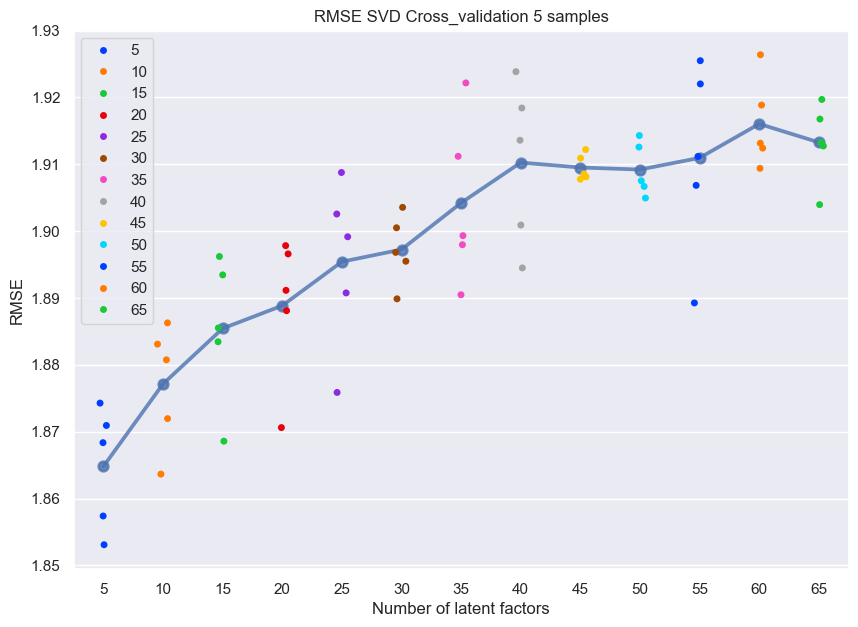

In [110]:

sns.set_theme(rc={'figure.figsize':(10,7)})
#ax = sns.boxplot(data=df, x="k", y="test_rmse", width=.5, whis=(0, 100))
ax = sns.stripplot(data=df, x="k", y="test_rmse", hue="k", palette="bright")
sns.pointplot(data=df, x="k", y="mean_rmse", alpha=0.8)
ax.set_title(f"RMSE SVD Cross_validation {SPLITS} samples")
ax.set_xlabel("Number of latent factors")
ax.set_ylabel("RMSE")

Text(0, 0.5, 'MAE')

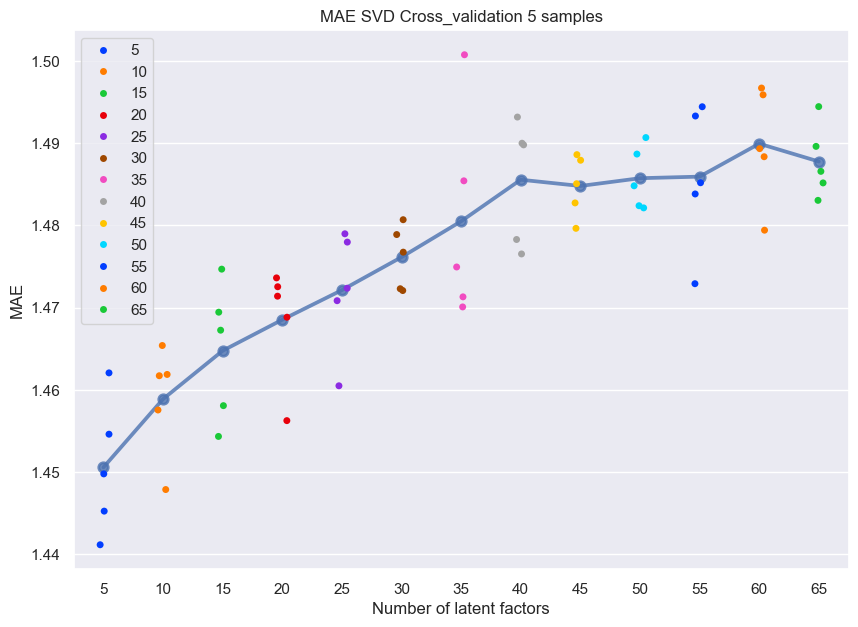

In [111]:

sns.set_theme(rc={'figure.figsize':(10,7)})
#ax = sns.boxplot(data=df, x="k", y="test_mae", width=.5, whis=(0, 100))
ax = sns.stripplot(data=df, x="k", y="test_mae", hue="k", palette="bright")
sns.pointplot(data=df, x="k", y="mean_mae", alpha=0.8)
ax.set_title(f"MAE SVD Cross_validation {SPLITS} samples")
ax.set_xlabel("Number of latent factors")
ax.set_ylabel("MAE")

### Resulting matrices from factorization

In [112]:
model = SVD(n_factors=10, random_state=1)
trainset = data.build_full_trainset()
model.fit(trainset)

In [113]:
# Matrice P (facteurs latents des utilisateurs)
P = np.array([model.pu[uid] for uid in trainset.all_users()])

# Matrice Q (facteurs latents des items)
Q = np.array([model.qi[iid] for iid in trainset.all_items()])

bu = np.array([model.bu[uid] for uid in trainset.all_users()])
bi = np.array([model.bi[iid] for iid in trainset.all_items()])

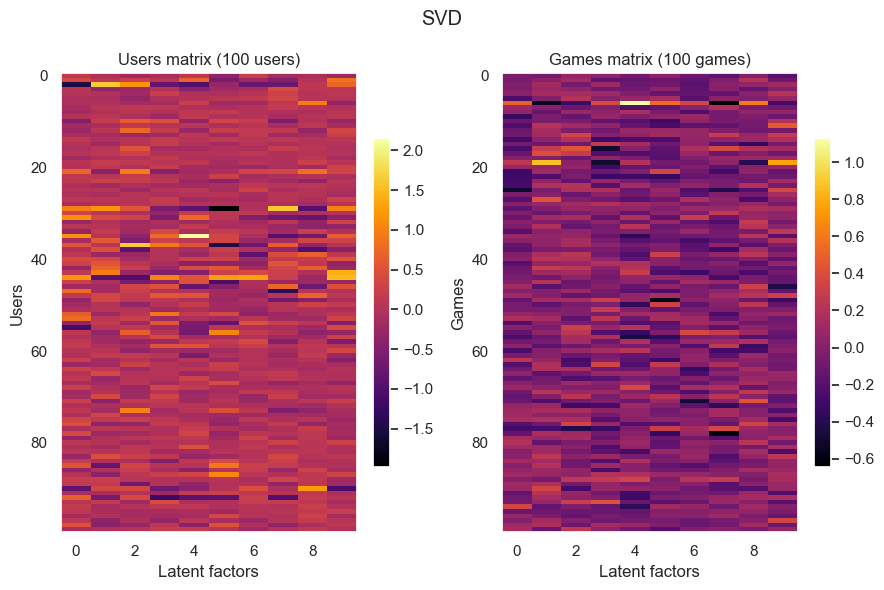

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2)

Pim = ax1.imshow(P[:100, :], aspect='auto', cmap="inferno")
ax1.set_xlabel("Latent factors")
ax1.set_ylabel("Users")
ax1.set_title("Users matrix (100 users)")
ax1.grid(False)

Qim = ax2.imshow(Q[:100, :], aspect='auto', cmap="inferno")
ax2.set_xlabel("Latent factors")
ax2.set_ylabel("Games")
ax2.set_title("Games matrix (100 games)")
ax2.grid(False)

fig.colorbar(Qim, fraction=0.05)
fig.colorbar(Pim, fraction=0.05)

fig.suptitle(r"SVD")
fig.set_size_inches(9, 6)
plt.tight_layout()

### Biases $b_u$, $b_i$

Text(0.5, 1.0, "Games' biases")

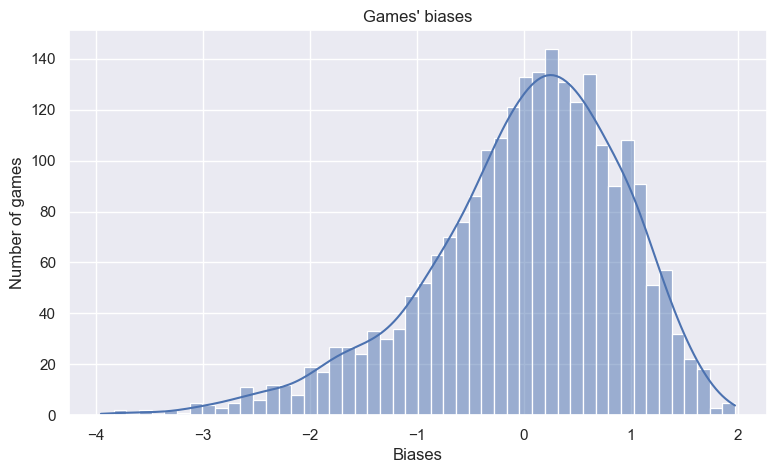

In [117]:
sns.set_theme(rc={'figure.figsize':(9,5)})
sns.histplot(bi, bins=50, kde=True)
plt.xlabel("Biases")
plt.ylabel("Number of games")
plt.title("Games' biases")

Text(0.5, 1.0, "Users' biases")

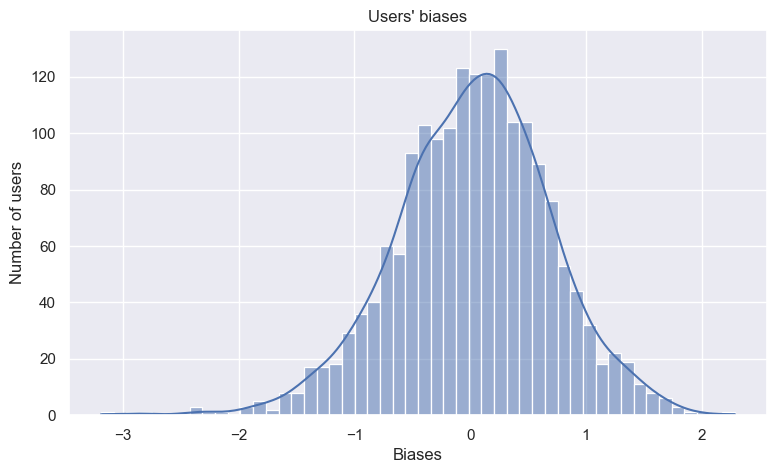

In [118]:
sns.set_theme(rc={'figure.figsize':(9,5)})
sns.histplot(bu, bins=50, kde=True)
plt.xlabel("Biases")
plt.ylabel("Number of users")
plt.title("Users' biases")